In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
url = "https://www.meesho.com/tshirts-men/pl/3k8?Category[0][id]=5195&Category[0][label]=Men%20T-shirts&Category[0][payload]=eyJmaWVsZCI6ImxhYmVscy4xIiwib3AiOiJpbiIsInZhbHVlIjoiNTE5NSJ9&Gender[0][id]=444&Gender[0][label]=Men&Gender[0][payload]=eyJmaWVsZCI6ImxhYmVscy45Iiwib3AiOiJpbiIsInZhbHVlIjoiNDQ0In0%3D"

page = requests.get(url)
print(page)
soup = BeautifulSoup(page.text, 'html')
print(soup)

<Response [200]>
<!DOCTYPE html>
<html lang="en"><head><title>Men’s T-Shirts Online in India – Latest Trends &amp; Affordable Prices</title><meta content="Explore a wide range of men’s T-shirts designed for Indian fashion enthusiasts. From classic cotton tees to trendy printed styles, find your perfect fit at Meesho. Enjoy unbeatable prices, easy returns, and COD across India. Upgrade your everyday style effortlessly!" name="description"/><meta content="meesho,products" property="keywords"/><meta content="Meesho" property="twitter:creator"/><meta content="Men’s T-Shirts Online in India – Latest Trends &amp; Affordable Prices" property="twitter:title"/><meta content="Explore a wide range of men’s T-shirts designed for Indian fashion enthusiasts. From classic cotton tees to trendy printed styles, find your perfect fit at Meesho. Enjoy unbeatable prices, easy returns, and COD across India. Upgrade your everyday style effortlessly!" property="twitter:description"/><meta content="EiBr3hKwYk

In [ ]:
table = soup.find_all("div",class_='NewProductCardstyled__ProductHeaderWrapper-sc-6y2tys-32')

print(table)

[<div class="NewProductCardstyled__ProductHeaderWrapper-sc-6y2tys-32 knWeEt"><p class="sc-eDvSVe gQDOBc NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU" color="greyT2" font-size="16px" font-weight="book">Men Polycotton Regular Tshirts</p></div>, <div class="NewProductCardstyled__ProductHeaderWrapper-sc-6y2tys-32 knWeEt"><p class="sc-eDvSVe gQDOBc NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU" color="greyT2" font-size="16px" font-weight="book">Urbane Designer Men Tshirts</p></div>, <div class="NewProductCardstyled__ProductHeaderWrapper-sc-6y2tys-32 knWeEt"><p class="sc-eDvSVe gQDOBc NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU NewProductCardstyled__StyledDesktopProductTitle-sc-6y2tys-5 ejhQZU" color="greyT2" font-size="16px" font-weight="book">Fancy Designer Men Tshirts</p></div>, <div class="N

In [ ]:
name = []
for i in table:
  names = i.text
  name.append(names)
print(name)
print(len(name))

['Men Polycotton Regular Tshirts', 'Urbane Designer Men Tshirts', 'Fancy Designer Men Tshirts', 'Classy Glamorous Men Tshirts', 'Classy Partywear Men Tshirts', 'Men Cotton Regular Tshirts', 'Polyester Men Polyester Regular Tshirts', 'Pretty Designer Men Tshirts', 'Trendy Elegant Men Tshirts', 'Comfy Sensational Men Tshirts', "KASPY Men's Tshirts", 'Cotton Men Cotton Regular Tshirts', 'Fancy Glamorous Men Tshirts', 'Trendy Fabulous Men Tshirts', "Eyebogler Men's Tshirts", 'Trendy Latest Men Tshirts', 'Urbane Graceful Men Tshirts', 'Classic Fabulous Men Tshirts', 'Tshirts', 'Classic Latest Men Tshirts']
20


In [ ]:
p = soup.find_all("h5", class_ = "sc-eDvSVe dwCrSh")
price=[]
for i in p:
  prices = i.text
  price.append(prices)
print(price)
print(len(price))

['₹366 ', '₹188 ', '₹129 ', '₹148 ', '₹119 ', '₹371 ', '₹123 ', '₹327 ', '₹225 ', '₹249 ', '₹194 ', '₹160 ', '₹281 ', '₹294 ', '₹300 ', '₹297 ', '₹230 ', '₹271 ', '₹193 ', '₹186']
20


In [ ]:
k = soup.find_all("span", class_="sc-eDvSVe laVOtN")
rating=[]
for i in k:
  ratings = i.text
  rating.append(ratings)
print(rating)
print(len(rating))

['3.8', '3.9', '3.8', '3.8', '4.5', '4.0', '3.7', '3.9', '3.8', '3.7', '3.7', '4.0', '3.9', '3.7', '3.8', '3.7', '4.1', '3.9']
18


In [ ]:
l = soup.find_all('span', class_="sc-eDvSVe XndEO NewProductCardstyled__RatingCount-sc-6y2tys-22 iaGtYc NewProductCardstyled__RatingCount-sc-6y2tys-22 iaGtYc")
review=[]
for i in l:
  reviews=i.text
  review.append(reviews)
print(review)
print(len(review))

['13467 Reviews', '13247 Reviews', '13463 Reviews', '3548 Reviews', '8 Reviews', '16742 Reviews', '16409 Reviews', '1211 Reviews', '8675 Reviews', '5846 Reviews', '3314 Reviews', '5401 Reviews', '449 Reviews', '59 Reviews', '27654 Reviews', '421 Reviews', '51 Reviews', '2558 Reviews']
18


In [ ]:
import numpy as np
import pandas as pd

# Find the maximum length among all lists
max_len = max(len(name), len(price), len(rating), len(review))

# Define a function to pad a list with None until it reaches max_len
def pad_list(lst, length, pad_value=None):
    return lst + [pad_value] * (length - len(lst))

name = pad_list(name, max_len)
price = pad_list(price, max_len)
rating = pad_list(rating, max_len)
review = pad_list(review, max_len)

df = pd.DataFrame({
    'Product Name': name,
    'Price': price,
    'Rating': rating,
    'Review': review
})
print(df)


                               Product Name  Price Rating         Review
0            Men Polycotton Regular Tshirts  ₹366     3.8  13467 Reviews
1               Urbane Designer Men Tshirts  ₹188     3.9  13247 Reviews
2                Fancy Designer Men Tshirts  ₹129     3.8  13463 Reviews
3              Classy Glamorous Men Tshirts  ₹148     3.8   3548 Reviews
4              Classy Partywear Men Tshirts  ₹119     4.5      8 Reviews
5                Men Cotton Regular Tshirts  ₹371     4.0  16742 Reviews
6   Polyester Men Polyester Regular Tshirts  ₹123     3.7  16409 Reviews
7               Pretty Designer Men Tshirts  ₹327     3.9   1211 Reviews
8                Trendy Elegant Men Tshirts  ₹225     3.8   8675 Reviews
9             Comfy Sensational Men Tshirts  ₹249     3.7   5846 Reviews
10                      KASPY Men's Tshirts  ₹194     3.7   3314 Reviews
11        Cotton Men Cotton Regular Tshirts  ₹160     4.0   5401 Reviews
12              Fancy Glamorous Men Tshirts  ₹281  

In [ ]:
df=df.dropna()

In [ ]:
df["Price"] = df["Price"].str.replace("₹", "")

In [ ]:
df["Review"] = df["Review"].str.replace(" Reviews", "")
df['Review']=df['Review'].astype(int)
df['Rating']=df['Rating'].astype(float)
df['Price']=df['Price'].astype(int)

In [ ]:
df.to_csv("Messo_data.csv")

In [ ]:
df.dtypes

,0
Product Name,object
Price,int64
Rating,float64
Review,int64


In [ ]:
df = pd.read_csv('/content/Messo_data.csv')
df.head()

,Unnamed: 0,Product Name,Price,Rating,Review
0,0,Men Polycotton Regular Tshirts,366,3.8,13467
1,1,Urbane Designer Men Tshirts,188,3.9,13247
2,2,Fancy Designer Men Tshirts,129,3.8,13463
3,3,Classy Glamorous Men Tshirts,148,3.8,3548
4,4,Classy Partywear Men Tshirts,119,4.5,8


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Product Name,0
Price,0
Rating,0
Review,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


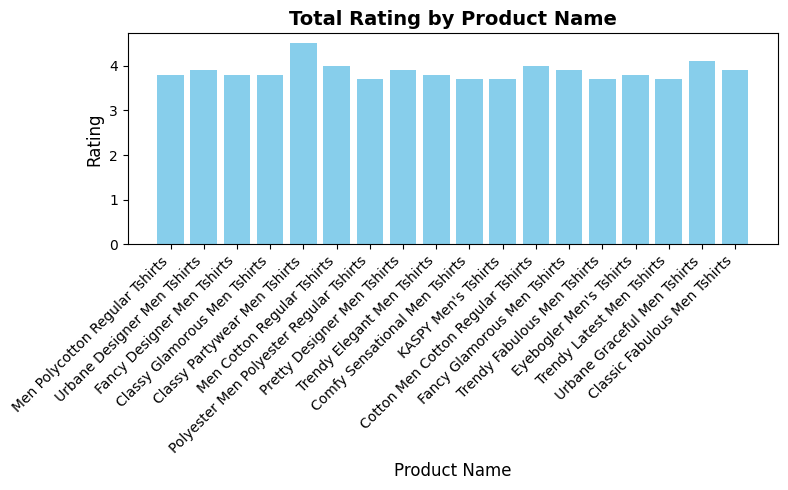

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Product Name'], df['Rating'], color='skyblue')
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Total Rating by Product Name", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

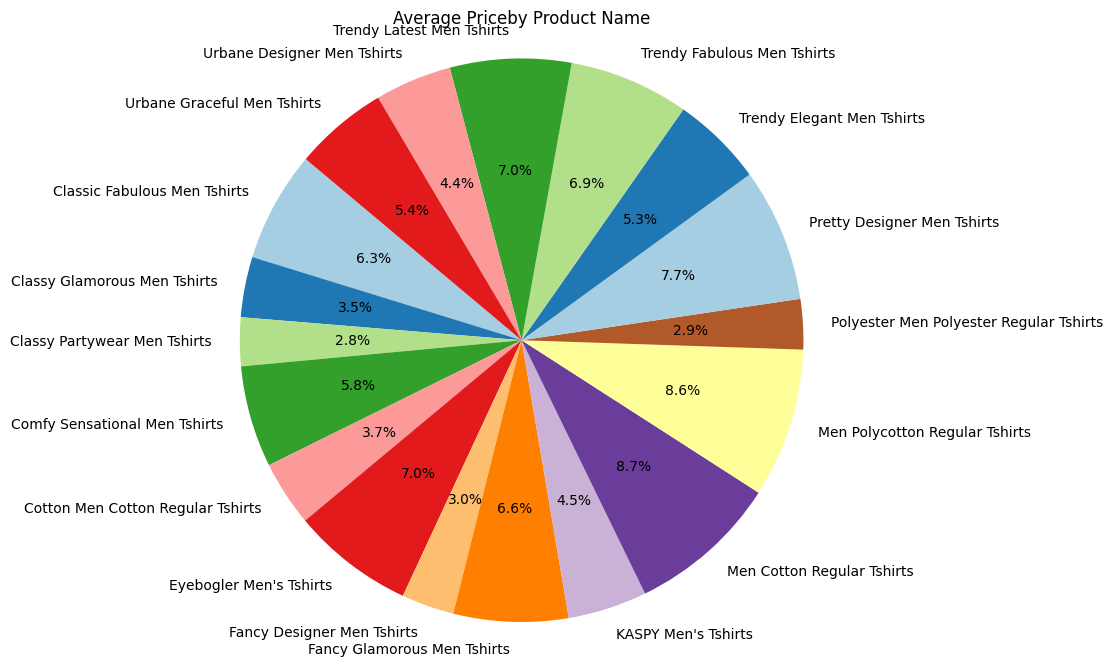

In [ ]:
avg_ratings = df.groupby('Product Name')['Price'].mean()
plt.figure(figsize=(8, 8))
plt.pie(avg_ratings, labels=avg_ratings.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Average Priceby Product Name")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-19-59a201c54f57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='Review', data=avg_sales, palette='viridis')


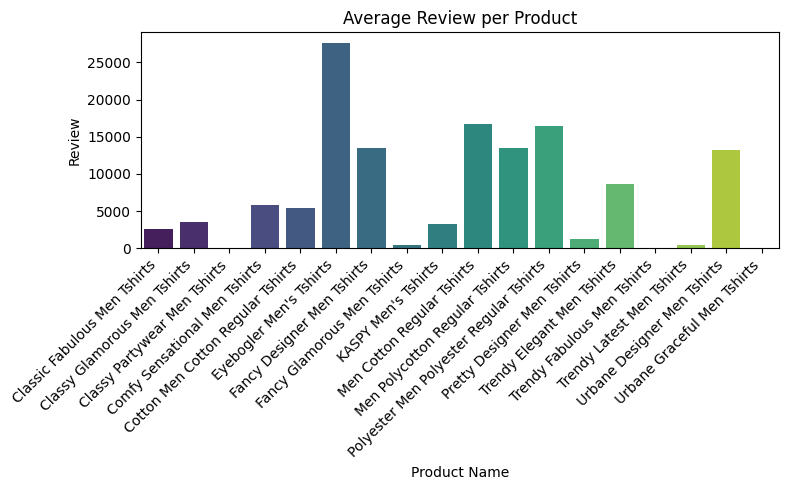

In [ ]:
avg_sales = df.groupby('Product Name')['Review'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Product Name', y='Review', data=avg_sales, palette='viridis')

plt.xlabel("Product Name")
plt.ylabel("Review")
plt.title("Average Review per Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
Coments=['Good','Nice','Excellent','Cheap','Quality Poor','Not worth it','Not worth it', 'Average product','Not Good',
    'Better','Very Good','Bad Quality','Satisfied','Not Satisfied','Price is too High accoridng this product','Damaged','Good','Best']
sales_data = [

    14560047, 2573654, 5637894, 3637849, 4563748,

    6748576, 2225467, 3373657, 7365533, 5578364,

    66627654, 7787653, 8887543, 9998765, 1786352,

    1176547, 1297654, 1365434

]

In [ ]:
df['Coments']=Coments
df['Sales_data']=sales_data

In [ ]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Review,Coments,Sales_data
0,0,Men Polycotton Regular Tshirts,366,3.8,13467,Good,14560047
1,1,Urbane Designer Men Tshirts,188,3.9,13247,Nice,2573654
2,2,Fancy Designer Men Tshirts,129,3.8,13463,Excellent,5637894
3,3,Classy Glamorous Men Tshirts,148,3.8,3548,Cheap,3637849
4,4,Classy Partywear Men Tshirts,119,4.5,8,Quality Poor,4563748


In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis(Coments):
    # Get the sentiment polarity of the review
    sentiment = TextBlob(Coments).sentiment.polarity

    # Classify based on the polarity score
    if sentiment > 0.1:
        return 'positive'
    elif sentiment < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['Coments'].apply(textblob_sentiment_analysis)
df.head()

,Unnamed: 0,Product Name,Price,Rating,Review,Coments,Sales_data,sentiment
0,0,Men Polycotton Regular Tshirts,366,3.8,13467,Good,14560047,positive
1,1,Urbane Designer Men Tshirts,188,3.9,13247,Nice,2573654,positive
2,2,Fancy Designer Men Tshirts,129,3.8,13463,Excellent,5637894,positive
3,3,Classy Glamorous Men Tshirts,148,3.8,3548,Cheap,3637849,positive
4,4,Classy Partywear Men Tshirts,119,4.5,8,Quality Poor,4563748,negative


In [ ]:
sentiment_distribution=df['sentiment'].value_counts()
sentiment_distribution

,count
sentiment,
positive,10
negative,7
neutral,1


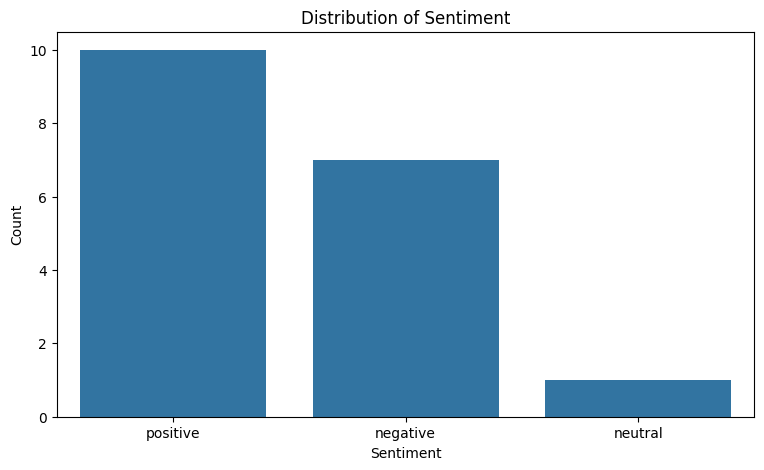

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

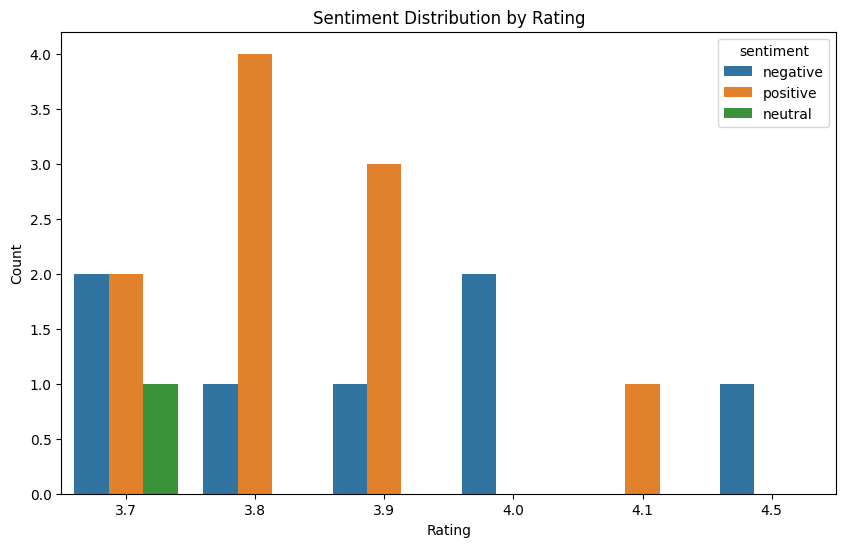

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Rating", hue="sentiment", data=df)
plt.title("Sentiment Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="sentiment")
plt.show()

<ipython-input-34-02ea072b1843>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='Sales_data', data=avg_sales, palette='viridis')


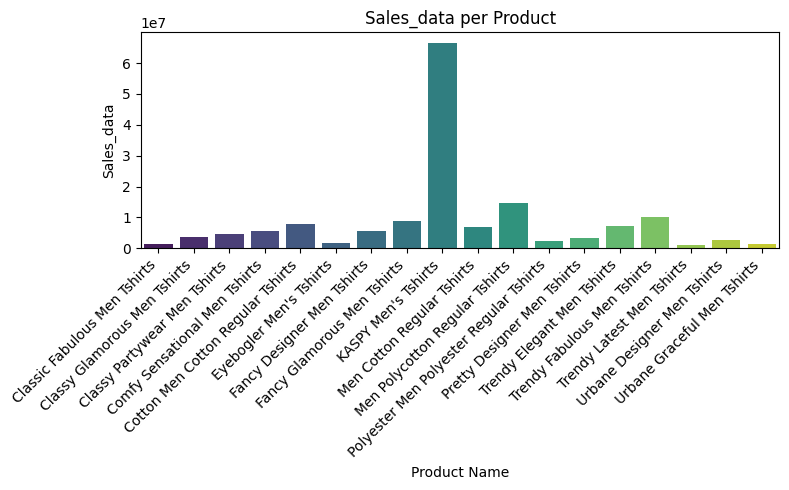

In [ ]:
avg_sales = df.groupby('Product Name')['Sales_data'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Product Name', y='Sales_data', data=avg_sales, palette='viridis')

plt.xlabel("Product Name")
plt.ylabel("Sales_data")
plt.title("Sales_data per Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
df['Product Name']=lb.fit_transform(df['Product Name'])
df['Coments']=lb.fit_transform(df['Coments'])
df['sentiment']=lb.fit_transform(df['sentiment'])

In [ ]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Review,Coments,Sales_data,sentiment
0,0,10,366,3.8,13467,7,14560047,2
1,1,16,188,3.9,13247,8,2573654,2
2,2,6,129,3.8,13463,6,5637894,2
3,3,1,148,3.8,3548,4,3637849,2
4,4,2,119,4.5,8,13,4563748,0


In [ ]:
x = df.drop(columns=['Rating'])
y = df['Rating']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,
                                                       random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

-11.567281938438434

In [ ]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lr, param_space, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [ ]:
print(f"Best Score: {grid_search.best_score_}")

Best Score: -3.406005124078399
